## Домашняя работа 1

### Выполнила: Евсикова Дарья
### МОиАД, 1 курс
________________________________________

Постройте график относительной погрешности при вычислении $exp\;(-x)$ с помощью разложения в ряд Тейлора для подходящего диапазона $x$, $x\ge 0$

Сравните результаты для одинарной и двойной точности

In [174]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [175]:
def exp_taylor(x, N, typ):
    res = typ(0)
    K = np.arange(0, N + 1, dtype=typ)

    for k in K:
        res += typ(typ(x ** k) / typ(np.math.factorial(k)))
    
    return typ(res ** (-1))


def exp_perf(x, typ):
    return typ(np.exp(-x))

#### Одинарная точность

In [176]:
# 1000 точек в интервале [0,20]
xs = np.linspace(0, 20, 1000, dtype=np.float32)

In [177]:
# рассчитываем относительную ошибку
err = np.array([])
for x in xs:
    eval1 = exp_taylor(x, 29, np.float32) # максимальное N=29, т.к. для него нет переполнения np.float32
    eval2 = exp_perf(x, np.float32)
    err = np.append(err, abs(eval2 - eval1) / eval2)

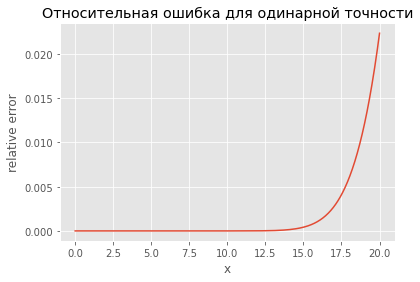

In [178]:
# строим график зависимости относительной ошибки от x
plt.plot(xs, err)
plt.title('Относительная ошибка для одинарной точности')
plt.ylabel('relative error')
plt.xlabel('x')
plt.show()

С ростом значений $x$ относительная ошибка при одинарной точности возрастает. Согласно графику, одинарной точности "не хватает" для сложения чисел, превышающих ~12. 

Разложение в ряд Тейлора при данной точности возможно реализовать до $N=29$ члена, при котором не возникает переполнения для каждой компоненты формулы (факториала, возведения в степень).

Аппроксимация экспоненты при одинарной точности адекватна в окрестности $x=0$.

#### Двойная точность

In [218]:
# 500 точек в интервале [0,20]
xs = np.linspace(0, 20, 500, dtype=np.float64)

In [219]:
# считаем относительную ошибку
err2 = np.array([])
for x in xs:
    eval1 = exp_taylor(x, 170, np.float64) # максимальное N=170
    eval2 = exp_perf(x, np.float64)
    err2 = np.append(err2, abs(eval2 - eval1) / eval2)

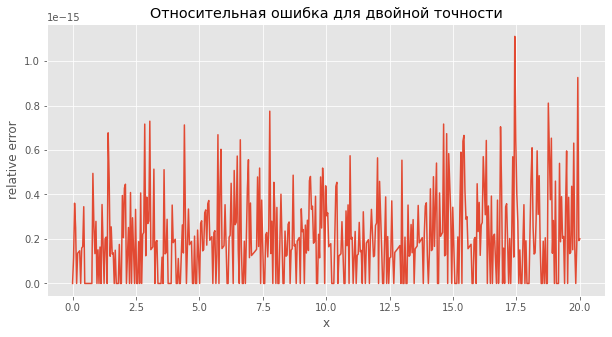

In [221]:
# строим график зависимости относительной ошибки от x
plt.figure(figsize=(10,5))
plt.plot(xs, err2)
plt.title('Относительная ошибка для двойной точности')
plt.ylabel('relative error')
plt.xlabel('x')
plt.show()

Ошибка при двойной точности в заданном интервале $x \in [0,20]$ вполне адекватна -  она находится в районе машинной точности ($10^{-16}$). То есть приближенное вычисление экспоненты с помощью разложения в ряд Тейлора до $N=170$ члена дает достаточно точный результат 